<h2 style='color:blue' align="center">KNN (K Nearest Neighbors) Classification: Machine Tutorial Using Python Sklearn</h2>

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

<img height=300 width=300 src="iris_petal_sepal.png" />

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# 1-50 setosa, 51-100 versicolor, 101-150 virginica
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
87,6.3,2.3,4.4,1.3,1
66,5.6,3.0,4.5,1.5,1
67,5.8,2.7,4.1,1.0,1
46,5.1,3.8,1.6,0.2,0
110,6.5,3.2,5.1,2.0,2


In [15]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
63,6.1,2.9,4.7,1.4,1,versicolor
128,6.4,2.8,5.6,2.1,2,virginica
67,5.8,2.7,4.1,1.0,1,versicolor
42,4.4,3.2,1.3,0.2,0,setosa
45,4.8,3.0,1.4,0.3,0,setosa


In [18]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

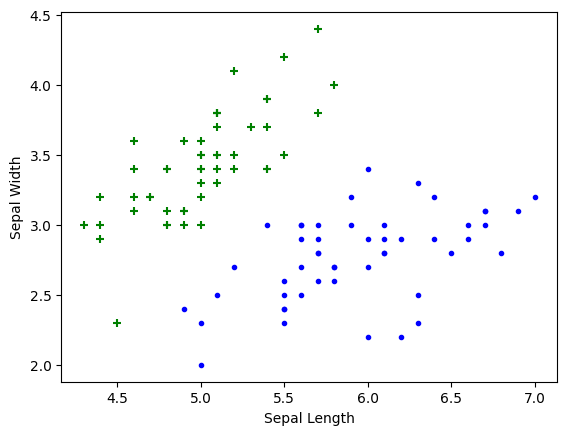

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

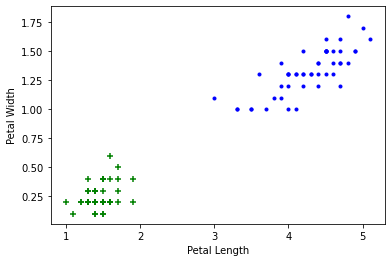

In [58]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Train test split**

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))
print(len(X_test))

120
30


**Create KNN (K Neighrest Neighbour Classifier)**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.score(X_test, y_test)

1.0

In [31]:
knn.predict([[4.8,3.0,1.5,0.3]])[0]

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

**Plot Confusion Matrix**

In [68]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

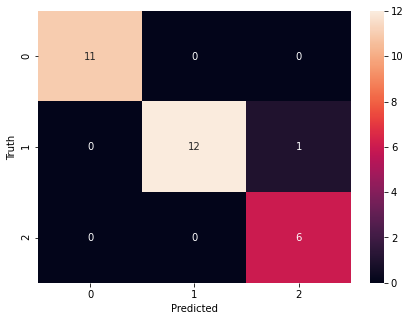

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Print classification report for precesion, recall and f1-score for each classes**

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**Do not forget to work on exercise, exercise link is below** 

https://github.com/codebasics/py/blob/master/ML/17_knn_classification/knn_exercise.md
